In [1]:
import numpy as np
import pandas as pd
import gc 

In [2]:
!ls fb_datathon_dataset/ml_preds_csv 

3001120103000.csv  3001120103100.csv  3001120103200.csv  3001120103300.csv
3001120103001.csv  3001120103101.csv  3001120103201.csv  3001120103301.csv
3001120103002.csv  3001120103102.csv  3001120103202.csv  3001120103302.csv
3001120103003.csv  3001120103103.csv  3001120103203.csv  3001120103303.csv
3001120103010.csv  3001120103110.csv  3001120103210.csv  3001120103310.csv
3001120103011.csv  3001120103111.csv  3001120103211.csv  3001120103311.csv
3001120103012.csv  3001120103112.csv  3001120103212.csv  3001120103312.csv
3001120103013.csv  3001120103113.csv  3001120103213.csv  3001120103313.csv
3001120103020.csv  3001120103120.csv  3001120103220.csv  3001120103320.csv
3001120103021.csv  3001120103121.csv  3001120103221.csv  3001120103321.csv
3001120103022.csv  3001120103122.csv  3001120103222.csv  3001120103322.csv
3001120103023.csv  3001120103123.csv  3001120103223.csv  3001120103323.csv
3001120103030.csv  3001120103130.csv  3001120103230.csv  3001120103330.csv
3001120103031.csv  300112

In [3]:
!ls fb_datathon_dataset/

 3001120103.xml			        ml_preds_png
'Datathon Challenge_ Map With AI.pdf'   routing_challenge_pairs.csv
 df_map.csv			        tz_popdens_sample.csv
 ml_preds_csv


# Order of the map
### We did not know that you actually ordered the map for us.... But it works!!

In [4]:
#Map list
import glob, os
parent_dir = 'fb_datathon_dataset/ml_preds_csv/'
listOfFile=[]
for pdf_file in glob.glob(os.path.join(parent_dir, '*.csv')):
    a=pdf_file.split('/')[2].split('.')
    listOfFile.append(int(a[0]))
len(listOfFile)


64

In [5]:
#Pixel distance
map_=3001120103000
df_temp=pd.read_csv("fb_datathon_dataset/ml_preds_csv/{}.csv".format(map_))
df_temp.head()

,pixel_i,pixel_j,val,latitude,longitude
0,0,424,6,-5.965754,35.510087
1,0,425,7,-5.965754,35.510092
2,0,426,8,-5.965754,35.510098
3,0,427,9,-5.965754,35.510103
4,0,428,8,-5.965754,35.510108


In [6]:
#Constant
j_unit=np.abs(df_temp.iloc[0].longitude-df_temp.iloc[1].longitude)
i_unit=np.abs(list(df_temp[df_temp.pixel_i==1].latitude)[0]-df_temp.iloc[0].latitude)

In [7]:
df=pd.DataFrame({})
first_pix=[]
arrayPoint=[]
for map_ in listOfFile:
    df=pd.read_csv("fb_datathon_dataset/ml_preds_csv/{}.csv".format(map_))
    a_point=df.iloc[0]
    first_point_lat=(a_point.latitude-i_unit*a_point.pixel_i)
    first_point_long=(a_point.longitude-j_unit*a_point.pixel_j)
    arrayPoint.append((first_point_lat,first_point_long,map_))

In [8]:
import matplotlib.pyplot as plt
x=[ i[0] for i in arrayPoint]
y=[ i[1] for i in arrayPoint]
map_name=[ i[2] for i in arrayPoint]

area = np.pi*5

plt.scatter(x, y, s=area, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


<Figure size 640x480 with 1 Axes>

In [9]:
arrayPoint.sort()
list_map=[i[0] for i in arrayPoint]

In [10]:
list_=[]

for i in [1,2,3,4,5,6,7,8]:
    list_.append([j[2] for j in arrayPoint[(i-1)*8:i*8]])

df_map=pd.DataFrame({})
count=0
for i in np.array(list_).T:
    k=list(i)
    k.reverse()
    df_map["{}".format(count)]=k
    count+=1

In [11]:
df_map

,0,1,2,3,4,5,6,7
0,3001120103000,3001120103001,3001120103010,3001120103011,3001120103100,3001120103101,3001120103110,3001120103111
1,3001120103002,3001120103003,3001120103012,3001120103013,3001120103102,3001120103103,3001120103112,3001120103113
2,3001120103020,3001120103021,3001120103030,3001120103031,3001120103120,3001120103121,3001120103130,3001120103131
3,3001120103022,3001120103023,3001120103032,3001120103033,3001120103122,3001120103123,3001120103132,3001120103133
4,3001120103200,3001120103201,3001120103210,3001120103211,3001120103300,3001120103301,3001120103310,3001120103311
5,3001120103202,3001120103203,3001120103212,3001120103213,3001120103302,3001120103303,3001120103312,3001120103313
6,3001120103220,3001120103221,3001120103230,3001120103231,3001120103320,3001120103321,3001120103330,3001120103331
7,3001120103222,3001120103223,3001120103232,3001120103233,3001120103322,3001120103323,3001120103332,3001120103333


In [12]:
!rm Data/df_map.csv
df_map.to_csv("fb_datathon_dataset/df_map.csv")

rm: cannot remove 'Data/df_map.csv': No such file or directory


# Find the shortest distance

In [13]:
#Import population
pop_dens=pd.read_csv("fb_datathon_dataset/tz_popdens_sample.csv")
print(len(pop_dens))

101563


In [14]:
# This function returns the matrix of population density that is in each tile.
def pop_dens_map(maps):
    df_map=pd.read_csv("fb_datathon_dataset/ml_preds_csv/{}.csv".format(maps))
    row_=df_map.iloc[0]
    
    x_0=row_.latitude-i_unit*row_.pixel_i
    x_n=x_0+8192*i_unit
    y_0=row_.longitude-j_unit*row_.pixel_j
    y_n=y_0+8192*j_unit

    fool = pop_dens[(pop_dens['latitude']>x_0)&(pop_dens['latitude']<x_n)&(pop_dens['longitude']>y_0)&(pop_dens['longitude']<y_n)]
    return fool 

In [15]:
df_map.iloc[1,1]

3001120103003

In [16]:
def clean_map(maps):
    df_map=pd.read_csv("fb_datathon_dataset/ml_preds_csv/{}.csv".format(maps))
    return df_map[df_map['val']>75]

In [17]:
def l2_norm(p1,p2):
    dist=(p1[0]-p2[0])**2+(p1[1]-p2[1])**2
    return dist

In [18]:
df_map.head()

,0,1,2,3,4,5,6,7
0,3001120103000,3001120103001,3001120103010,3001120103011,3001120103100,3001120103101,3001120103110,3001120103111
1,3001120103002,3001120103003,3001120103012,3001120103013,3001120103102,3001120103103,3001120103112,3001120103113
2,3001120103020,3001120103021,3001120103030,3001120103031,3001120103120,3001120103121,3001120103130,3001120103131
3,3001120103022,3001120103023,3001120103032,3001120103033,3001120103122,3001120103123,3001120103132,3001120103133
4,3001120103200,3001120103201,3001120103210,3001120103211,3001120103300,3001120103301,3001120103310,3001120103311


In [19]:
listOfFile

[3001120103311,
 3001120103013,
 3001120103010,
 3001120103110,
 3001120103023,
 3001120103333,
 3001120103011,
 3001120103330,
 3001120103021,
 3001120103100,
 3001120103301,
 3001120103203,
 3001120103232,
 3001120103320,
 3001120103111,
 3001120103213,
 3001120103231,
 3001120103210,
 3001120103230,
 3001120103022,
 3001120103032,
 3001120103131,
 3001120103322,
 3001120103211,
 3001120103103,
 3001120103300,
 3001120103312,
 3001120103212,
 3001120103113,
 3001120103331,
 3001120103003,
 3001120103222,
 3001120103223,
 3001120103200,
 3001120103221,
 3001120103323,
 3001120103112,
 3001120103031,
 3001120103000,
 3001120103123,
 3001120103121,
 3001120103201,
 3001120103220,
 3001120103233,
 3001120103313,
 3001120103332,
 3001120103122,
 3001120103102,
 3001120103101,
 3001120103001,
 3001120103033,
 3001120103020,
 3001120103133,
 3001120103310,
 3001120103321,
 3001120103130,
 3001120103030,
 3001120103132,
 3001120103002,
 3001120103302,
 3001120103120,
 3001120103303,
 3001120

### Some testing

In [20]:
num_pop=[]
for i in listOfFile:
    num_pop.append(len(pop_dens_map(i)))

In [21]:
np.array(num_pop).sum()

93977

In [22]:
len(pop_dens)

101563

In [23]:
# For each image id, open the pandas matrix.
# df_map gives you the id.
maps=3001120103000
df_maps=pd.read_csv("fb_datathon_dataset/ml_preds_csv/{}.csv".format(maps))

In [24]:
len(pop_dens_map(3001120103000))

0

In [25]:
print(df_maps.latitude.min(),df_maps.latitude.max(),df_maps.longitude.min(),df_maps.longitude.max())

-6.009453902907334 -5.965753671065527 35.5078125 35.55175244808197


In [26]:
print(pop_dens.latitude.min(),pop_dens.latitude.max(),pop_dens.longitude.min(),pop_dens.longitude.max())

-6.31506018824 -5.9658935187800015 35.50796484532001 35.85935373702


So there are some sample that is not in our maps set. Especially, one of the map (3001120103000) has no population.

## Work

In [27]:
full_image = np.zeros((8192*8,8*8192),dtype=np.uint8)
for i in range(len(df_map)):
    for j in range(len(df_map)):
        maps = df_map.iloc[i,j]
        df_maps=pd.read_csv("fb_datathon_dataset/ml_preds_csv/{}.csv".format(maps))
        indx = df_maps.index[df_maps['val'] > 75]
        sss = df_maps[['pixel_i','pixel_j']]
        A = np.zeros((8192,8192),dtype=np.uint8)
        pixels = sss.iloc[indx].to_numpy()
        for k in range(len(pixels)):
            A[pixels[k,0],pixels[k,1]] = int(1)
        full_image[i*8192:(i+1)*8192,j*8192:(j+1)*8192] = int(1) - A
        print(i, j)


0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7


8

In [28]:
print(full_image.nbytes/1000000)


4294.967296


In [29]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)

In [44]:
# Use the source and destionation files now.
sources = pd.read_csv('./source_dists.csv')
destinations = pd.read_csv('./destination_dists.csv')
sources.head()

sources = sources[~(sources[['patch_loc']]==0).any(axis=1)].to_numpy()
destinations = destinations[~(destinations[['patch_loc']]==0).any(axis=1)].to_numpy()

sources.shape
sources


array([[0.0000000e+00, 1.9749153e-02, 8.1910000e+03, 7.9090000e+03,
        3.0011202e+12],
       [1.0000000e+00, 8.8375170e-03, 3.3300000e+02, 8.1910000e+03,
        3.0011202e+12],
       [2.0000000e+00, 8.8995965e-03, 2.6660000e+03, 0.0000000e+00,
        3.0011202e+12],
       ...,
       [9.9700000e+02, 1.5921966e-03, 2.3040000e+03, 8.1910000e+03,
        3.0011202e+12],
       [9.9800000e+02, 0.0000000e+00, 2.7060000e+03, 7.8220000e+03,
        3.0011202e+12],
       [9.9900000e+02, 4.5163175e-03, 1.0350000e+03, 8.1770000e+03,
        3.0011202e+12]])

In [52]:
np.where(df_map.to_numpy().astype(int)==int(sources[0,4]))

(array([], dtype=int64), array([], dtype=int64))

In [56]:
sources[0,4]



3001120200000.0

In [55]:
df_map

,0,1,2,3,4,5,6,7
0,3001120103000,3001120103001,3001120103010,3001120103011,3001120103100,3001120103101,3001120103110,3001120103111
1,3001120103002,3001120103003,3001120103012,3001120103013,3001120103102,3001120103103,3001120103112,3001120103113
2,3001120103020,3001120103021,3001120103030,3001120103031,3001120103120,3001120103121,3001120103130,3001120103131
3,3001120103022,3001120103023,3001120103032,3001120103033,3001120103122,3001120103123,3001120103132,3001120103133
4,3001120103200,3001120103201,3001120103210,3001120103211,3001120103300,3001120103301,3001120103310,3001120103311
5,3001120103202,3001120103203,3001120103212,3001120103213,3001120103302,3001120103303,3001120103312,3001120103313
6,3001120103220,3001120103221,3001120103230,3001120103231,3001120103320,3001120103321,3001120103330,3001120103331
7,3001120103222,3001120103223,3001120103232,3001120103233,3001120103322,3001120103323,3001120103332,3001120103333


In [239]:
def main(start, end):
    
    maze = full_image #[[0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
            #[0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
            #[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

    path = astar(maze, start, end)
    print(path)
    return(path)


[(0, 4422), (1, 4421), (2, 4420), (3, 4419), (4, 4418), (5, 4417), (6, 4416), (7, 4415), (8, 4415)]


In [265]:
for i in range(len(sources))
    path = main(sources[],end)

    path = np.array(path)
    count_diag = 0
    count_horiz = 0
    count_vert = 0

    for i in range(len(path)-1):
        if (    np.abs(path[i+1] - path[i]).sum() == 2):
            count_diag += 1
        elif( np.abs(path[i+1,1] - path[i,1]) == 1):
            count_horiz += 1
        else: 
            count_vert += 1

    dist = count_horiz * i_unit + count_vert * j_unit + count_diag * (np.sqrt(i_unit**2+j_unit**2))
    dist

5.8324786822154745e-05

In [268]:
j_unit

5.3644180155743015e-06

In [46]:
df_maps[sources[0,4]]

KeyError: 3001120200000

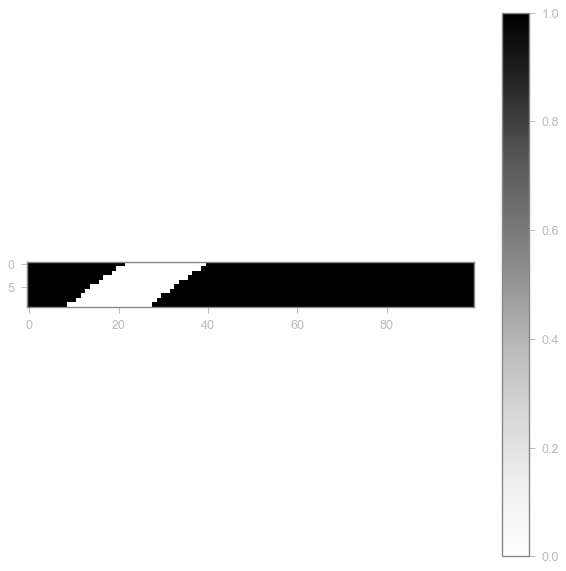

In [237]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(full_image[0:10,4400:4500],cmap='Greys',  interpolation='nearest')
plt.colorbar()
plt.show()